In [1]:
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt

In [2]:
#connect to my drive for save the results
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Copy the dataset to the local environment
!cp "/content/drive/MyDrive/upload_DJIA_table.csv" "DJIA.csv"

In [4]:
# Load the stock data
#df_stock = web.DataReader("DJIA",data_source="yahoo",
#                          start="2008-08-08",end="2016-07-01")

#change back to kaggle dataset, however I know it has some problem in it
df_stock = pd.read_csv('DJIA.csv', index_col = "Date")

# Show the stock data
df_stock

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234
...,...,...,...,...,...,...
2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688
2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727


In [5]:
df_stock.sort_index(axis=0,ascending=True,inplace=True)
df_stock

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688
...,...,...,...,...,...,...
2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234
2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688


In [6]:
df_stock.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1989.000000,1989.000000,1989.000000,1989.000000,1.989000e+03,1989.000000
mean,13459.116048,13541.303173,13372.931728,13463.032255,1.628110e+08,13463.032255
std,3143.281634,3136.271725,3150.420934,3144.006996,9.392343e+07,3144.006996
min,6547.009766,6709.609863,6469.950195,6547.049805,8.410000e+06,6547.049805
25%,10907.339844,11000.980469,10824.759766,10913.379883,1.000000e+08,10913.379883
50%,13022.049805,13088.110352,12953.129883,13025.580078,1.351700e+08,13025.580078
75%,16477.699219,16550.070312,16392.769531,16478.410156,1.926000e+08,16478.410156
max,18315.060547,18351.359375,18272.560547,18312.390625,6.749200e+08,18312.390625


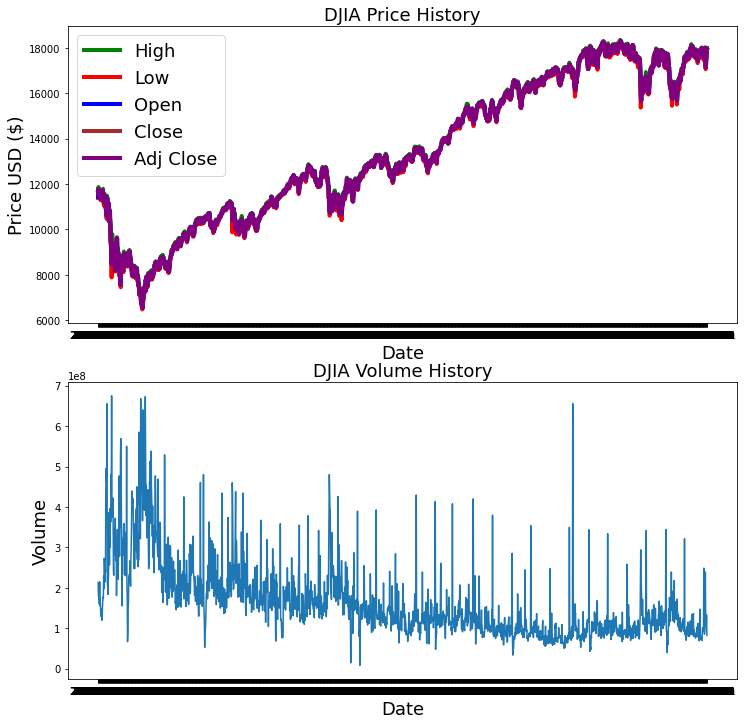

In [7]:
# Visualize
f, axs = plt.subplots(2, 1)

axs[0].plot(df_stock["High"], color="green", linewidth=4, label="High")
axs[0].plot(df_stock["Low"], color="red", linewidth=4, label="Low")
axs[0].plot(df_stock["Open"], color="blue", linewidth=4, label="Open")
axs[0].plot(df_stock["Close"], color="brown", linewidth=4, label="Close")
axs[0].plot(df_stock["Adj Close"], color="purple", linewidth=4, label="Adj Close")
axs[0].set_title("DJIA Price History", fontsize = 18)
axs[0].set_xlabel("Date", fontsize = 18)
axs[0].set_ylabel("Price USD ($)", fontsize = 18)
axs[0].legend(fontsize = 18)

axs[1].plot(df_stock["Volume"])
axs[1].set_title("DJIA Volume History", fontsize = 18)
axs[1].set_xlabel("Date", fontsize = 18)
axs[1].set_ylabel("Volume", fontsize = 18)

f.set_size_inches(12,12)
plt.show()

In [8]:
#check if close and adj close is ever different
diff_index = []
for row in range(len(df_stock)):
    if df_stock["Close"][row] != df_stock["Adj Close"][row]:
        diff_index.append(row)

diff_index

[]

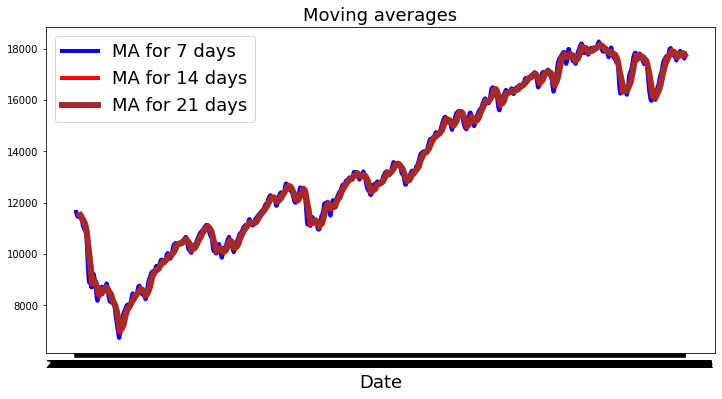

In [9]:
# Calculate moving average for 10, 20, 50 days
ma_day = [7, 14, 21]

for ma in ma_day:
  column_name = f"MA for {ma} days"
  df_stock[column_name] = df_stock["Adj Close"].rolling(ma).mean()

# Visualize the moving averages
f = plt.figure(figsize=(16,8))
plt.title("Moving averages", fontsize = 18)
plt.plot(df_stock["MA for 7 days"], color = "blue", linewidth = 4,
         label = "MA for 7 days")
plt.plot(df_stock["MA for 14 days"], color = "red", linewidth = 4,
         label = "MA for 14 days")
plt.plot(df_stock["MA for 21 days"], color = "brown", linewidth = 6, 
         label = "MA for 21 days")
plt.xlabel("Date",fontsize = 18)
plt.legend(fontsize = 18)
f.set_size_inches(12,6)
plt.show()

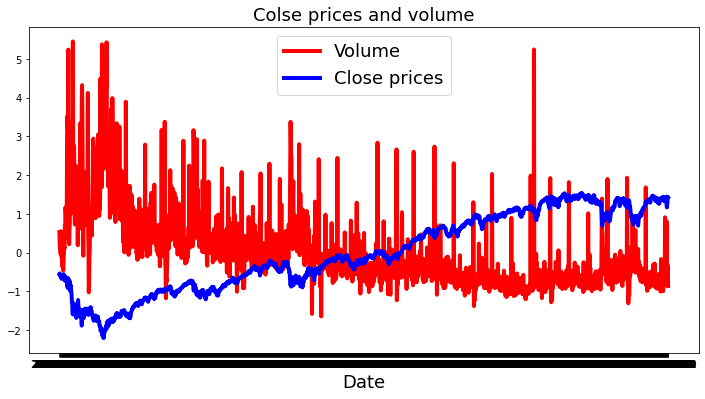

In [10]:
#check volatility with MA and create MA for that
# Visualize the moving averages and volume
# first create normalized input for plot
df_stock_close_norm = (df_stock["Close"] - df_stock["Close"].mean())/df_stock["Close"].std()
df_stock_vol_norm = (df_stock["Volume"] - df_stock["Volume"].mean())/df_stock["Volume"].std()

f = plt.figure(figsize=(16,8))
plt.title("Colse prices and volume", fontsize = 18)
plt.plot(df_stock_vol_norm, color = "red", linewidth = 4,
         label = "Volume")
plt.plot(df_stock_close_norm, color = "blue", linewidth = 4,
         label = "Close prices")
plt.xlabel("Date",fontsize = 18)
plt.legend(fontsize = 18)
f.set_size_inches(12,6)
plt.show()

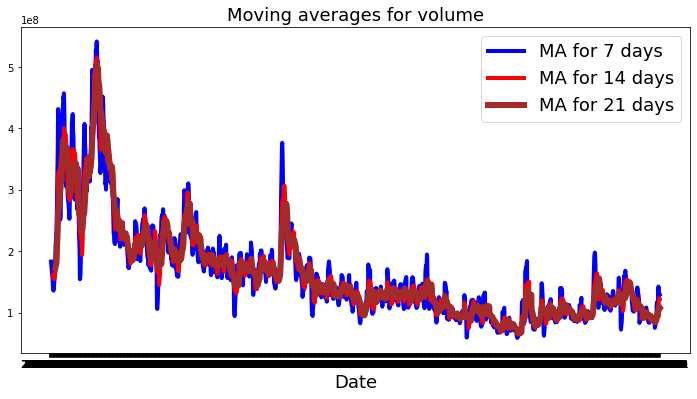

In [11]:
#move averages for volume and plot for them
for ma in ma_day:
  column_name = f"Volume MA for {ma} days"
  df_stock[column_name] = df_stock["Volume"].rolling(ma).mean()

# Visualize the moving averages
f = plt.figure(figsize=(16,8))
plt.title("Moving averages for volume", fontsize = 18)
plt.plot(df_stock["Volume MA for 7 days"], color = "blue", linewidth = 4,
         label = "MA for 7 days")
plt.plot(df_stock["Volume MA for 14 days"], color = "red", linewidth = 4,
         label = "MA for 14 days")
plt.plot(df_stock["Volume MA for 21 days"], color = "brown", linewidth = 6, 
         label = "MA for 21 days")
plt.xlabel("Date",fontsize = 18)
plt.legend(fontsize = 18)
f.set_size_inches(12,6)
plt.show()

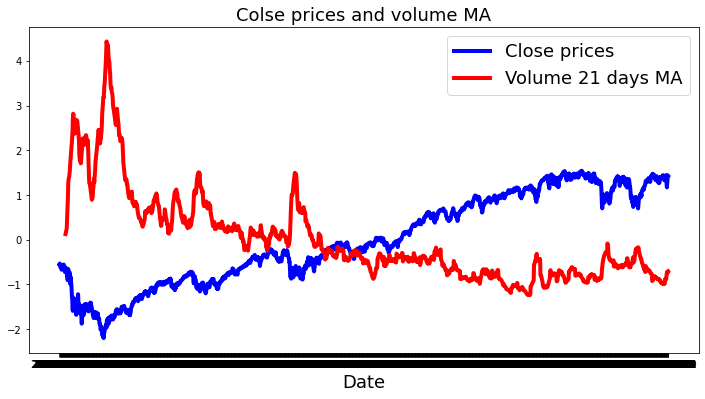

In [12]:
# Visualize the moving averages and volume
# first create normalized input for plot
df_stock_close_norm = (df_stock["Close"] - df_stock["Close"].mean())/df_stock["Close"].std()
df_stock_vol_MA_norm = (df_stock["Volume MA for 21 days"] - df_stock["Volume MA for 21 days"].mean())/df_stock["Volume MA for 21 days"].std()

f = plt.figure(figsize=(16,8))
plt.title("Colse prices and volume MA", fontsize = 18)
plt.plot(df_stock_close_norm, color = "blue", linewidth = 4,
         label = "Close prices")
plt.plot(df_stock_vol_MA_norm, color = "red", linewidth = 4,
         label = "Volume 21 days MA")
plt.xlabel("Date",fontsize = 18)
plt.legend(fontsize = 18)
f.set_size_inches(12,6)
plt.show()

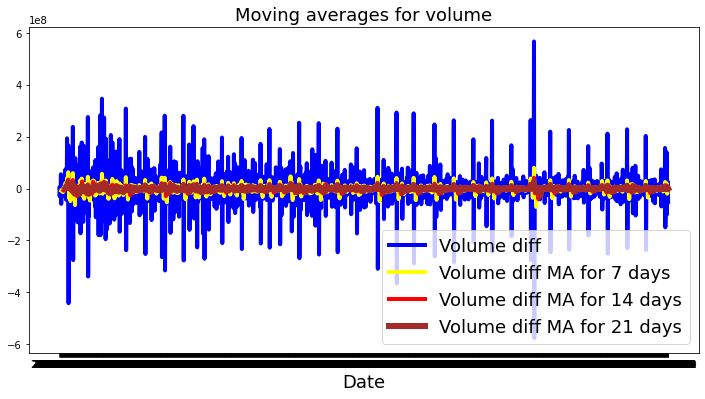

In [13]:
#calculate the diff volume for the before day
diff_volume = []
for row in range(len(df_stock)):
    if row == 0:
        diff_volume.append(0)
    else:
        diff_volume.append(df_stock["Volume"][row] - df_stock["Volume"][row - 1])

df_stock["Volume diff"] = diff_volume

for ma in ma_day:
  column_name = f"Volume diff MA for {ma} days"
  df_stock[column_name] = df_stock["Volume diff"].rolling(ma).mean()

#Visualize
f = plt.figure(figsize=(16,8))
plt.title("Moving averages for volume", fontsize = 18)
plt.plot(df_stock["Volume diff"], color = "blue", linewidth = 4,
         label = "Volume diff")
plt.plot(df_stock["Volume diff MA for 7 days"], color = "yellow", linewidth = 4,
         label = "Volume diff MA for 7 days")
plt.plot(df_stock["Volume diff MA for 14 days"], color = "red", linewidth = 4,
         label = "Volume diff MA for 14 days")
plt.plot(df_stock["Volume diff MA for 21 days"], color = "brown", linewidth = 6, 
         label = "Volume diff MA for 21 days")
plt.xlabel("Date",fontsize = 18)
plt.legend(fontsize = 18)
f.set_size_inches(12,6)
plt.show()

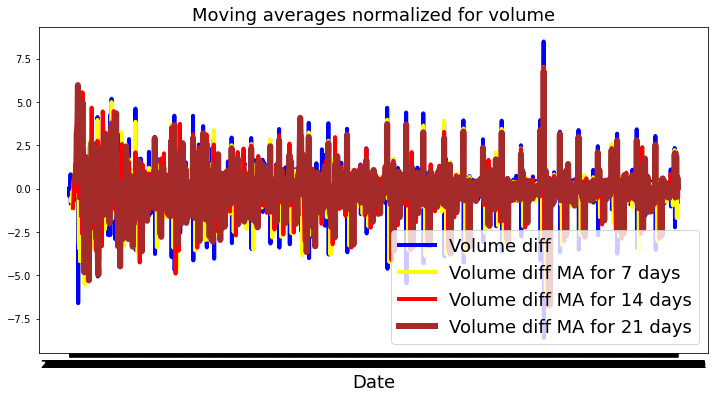

In [14]:
#volume changes visualization after normalization
df_stock_vol_diff_norm = (df_stock["Volume diff"] - df_stock["Volume diff"].mean())/df_stock["Volume diff"].std()
df_stock_vol_diff_7MA_norm = (df_stock["Volume diff MA for 7 days"] - df_stock["Volume diff MA for 7 days"].mean())/df_stock["Volume diff MA for 7 days"].std()
df_stock_vol_diff_14MA_norm = (df_stock["Volume diff MA for 14 days"] - df_stock["Volume diff MA for 14 days"].mean())/df_stock["Volume diff MA for 14 days"].std()
df_stock_vol_diff_21MA_norm = (df_stock["Volume diff MA for 21 days"] - df_stock["Volume diff MA for 21 days"].mean())/df_stock["Volume diff MA for 21 days"].std()

#Visualize
f = plt.figure(figsize=(16,8))
plt.title("Moving averages normalized for volume", fontsize = 18)
plt.plot(df_stock_vol_diff_norm, color = "blue", linewidth = 4,
         label = "Volume diff")
plt.plot(df_stock_vol_diff_7MA_norm, color = "yellow", linewidth = 4,
         label = "Volume diff MA for 7 days")
plt.plot(df_stock_vol_diff_14MA_norm, color = "red", linewidth = 4,
         label = "Volume diff MA for 14 days")
plt.plot(df_stock_vol_diff_21MA_norm, color = "brown", linewidth = 6, 
         label = "Volume diff MA for 21 days")
plt.xlabel("Date",fontsize = 18)
plt.legend(fontsize = 18)
f.set_size_inches(12,6)
plt.show()

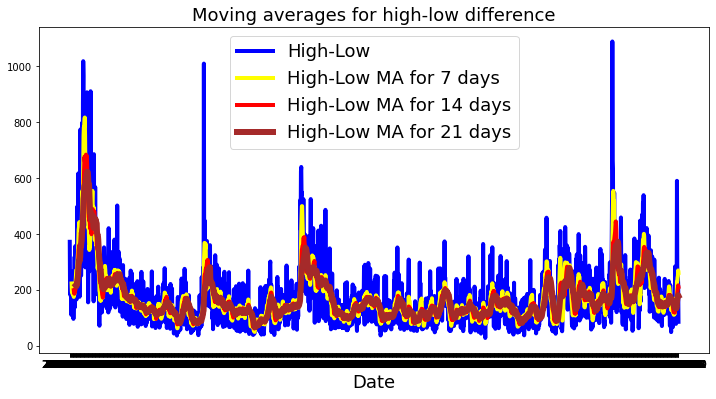

In [15]:
#H-L with MA
diff_H_L = []
for row in range(len(df_stock)):
    diff_H_L.append(df_stock["High"][row] - df_stock["Low"][row])

df_stock["High-Low"] = diff_H_L

for ma in ma_day:
  column_name = f"High-Low MA for {ma} days"
  df_stock[column_name] = df_stock["High-Low"].rolling(ma).mean()

#Visualize
f = plt.figure(figsize=(16,8))
plt.title("Moving averages for high-low difference", fontsize = 18)
plt.plot(df_stock["High-Low"], color = "blue", linewidth = 4,
         label = "High-Low")
plt.plot(df_stock["High-Low MA for 7 days"], color = "yellow", linewidth = 4,
         label = "High-Low MA for 7 days")
plt.plot(df_stock["High-Low MA for 14 days"], color = "red", linewidth = 4,
         label = "High-Low MA for 14 days")
plt.plot(df_stock["High-Low MA for 21 days"], color = "brown", linewidth = 6, 
         label = "High-Low MA for 21 days")
plt.xlabel("Date",fontsize = 18)
plt.legend(fontsize = 18)
f.set_size_inches(12,6)
plt.show()

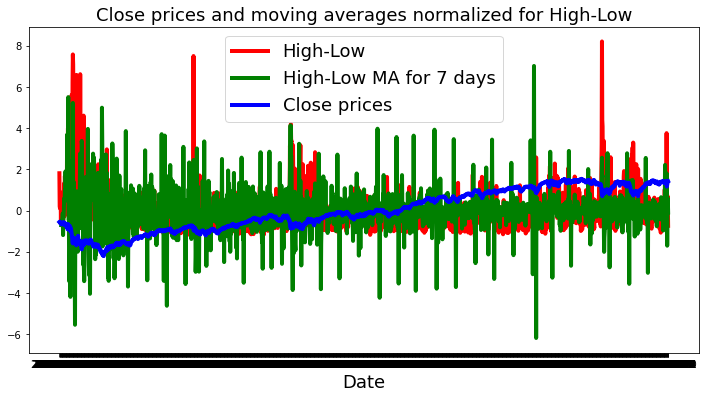

In [16]:
#plot H-L normalised with close values
df_stock_close_norm = (df_stock["Close"] - df_stock["Close"].mean())/df_stock["Close"].std()
df_stock_h_l_norm = (df_stock["High-Low"] - df_stock["High-Low"].mean())/df_stock["High-Low"].std()
df_stock_h_l_norm_7MA_norm = (df_stock["Volume diff MA for 7 days"] - df_stock["Volume diff MA for 7 days"].mean())/df_stock["Volume diff MA for 7 days"].std()

#Visualize
f = plt.figure(figsize=(16,8))
plt.title("Close prices and moving averages normalized for High-Low", fontsize = 18)
plt.plot(df_stock_h_l_norm, color = "red", linewidth = 4,
         label = "High-Low")
plt.plot(df_stock_h_l_norm_7MA_norm, color = "green", linewidth = 4,
         label = "High-Low MA for 7 days")
plt.plot(df_stock_close_norm, color = "blue", linewidth = 4,
         label = "Close prices")
plt.xlabel("Date",fontsize = 18)
plt.legend(fontsize = 18)
f.set_size_inches(12,6)
plt.show()

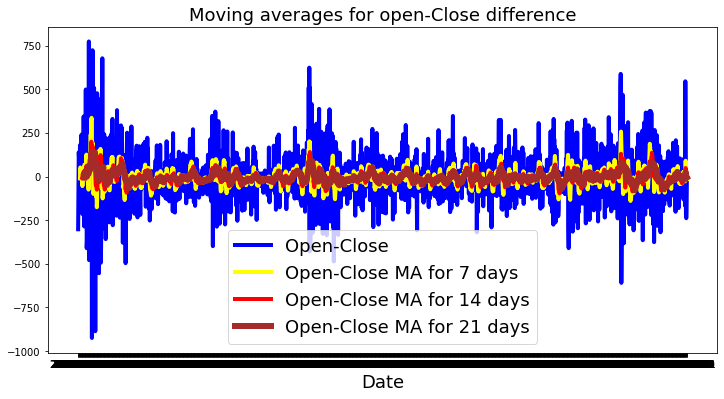

In [17]:
#O-C with MA
diff_O_C = []
for row in range(len(df_stock)):
    diff_O_C.append(df_stock["Open"][row] - df_stock["Close"][row])

df_stock["Open-Close"] = diff_O_C

for ma in ma_day:
  column_name = f"Open-Close MA for {ma} days"
  df_stock[column_name] = df_stock["Open-Close"].rolling(ma).mean()

#Visualize
f = plt.figure(figsize=(16,8))
plt.title("Moving averages for open-Close difference", fontsize = 18)
plt.plot(df_stock["Open-Close"], color = "blue", linewidth = 4,
         label = "Open-Close")
plt.plot(df_stock["Open-Close MA for 7 days"], color = "yellow", linewidth = 4,
         label = "Open-Close MA for 7 days")
plt.plot(df_stock["Open-Close MA for 14 days"], color = "red", linewidth = 4,
         label = "Open-Close MA for 14 days")
plt.plot(df_stock["Open-Close MA for 21 days"], color = "brown", linewidth = 6, 
         label = "Open-Close MA for 21 days")
plt.xlabel("Date",fontsize = 18)
plt.legend(fontsize = 18)
f.set_size_inches(12,6)
plt.show()

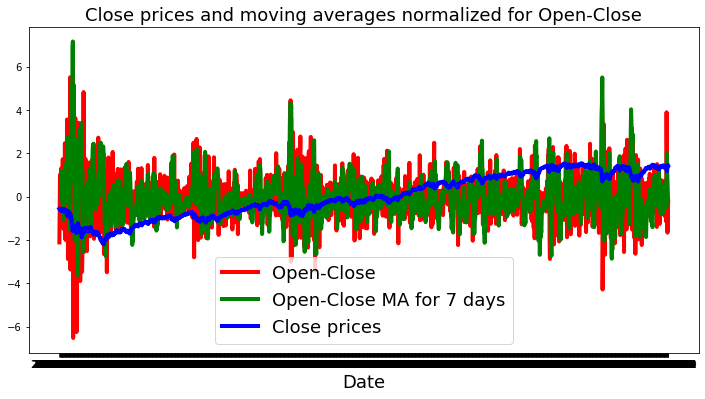

In [18]:
#plot H-L normalised with close values
df_stock_close_norm = (df_stock["Close"] - df_stock["Close"].mean())/df_stock["Close"].std()
df_stock_o_c_norm = (df_stock["Open-Close"] - df_stock["Open-Close"].mean())/df_stock["Open-Close"].std()
df_stock_o_c_norm_7MA_norm = (df_stock["Open-Close MA for 7 days"] - df_stock["Open-Close MA for 7 days"].mean())/df_stock["Open-Close MA for 7 days"].std()

#Visualize
f = plt.figure(figsize=(16,8))
plt.title("Close prices and moving averages normalized for Open-Close", fontsize = 18)
plt.plot(df_stock_o_c_norm, color = "red", linewidth = 4,
         label = "Open-Close")
plt.plot(df_stock_o_c_norm_7MA_norm, color = "green", linewidth = 4,
         label = "Open-Close MA for 7 days")
plt.plot(df_stock_close_norm, color = "blue", linewidth = 4,
         label = "Close prices")
plt.xlabel("Date",fontsize = 18)
plt.legend(fontsize = 18)
f.set_size_inches(12,6)
plt.show()

HERE

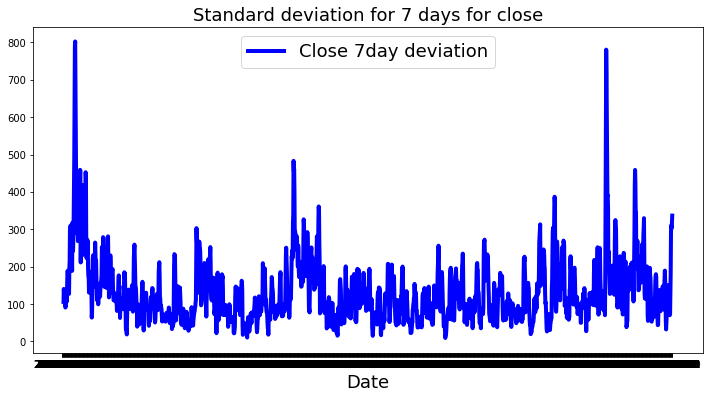

In [19]:
#close standard deviation
df_stock["Close 7day deviation"] = df_stock["Close"].rolling(7).std()

#Visualize
f = plt.figure(figsize=(16,8))
plt.title("Standard deviation for 7 days for close", fontsize = 18)
plt.plot(df_stock["Close 7day deviation"], color = "blue", linewidth = 4,
         label = "Close 7day deviation")
plt.xlabel("Date",fontsize = 18)
plt.legend(fontsize = 18)
f.set_size_inches(12,6)
plt.show()

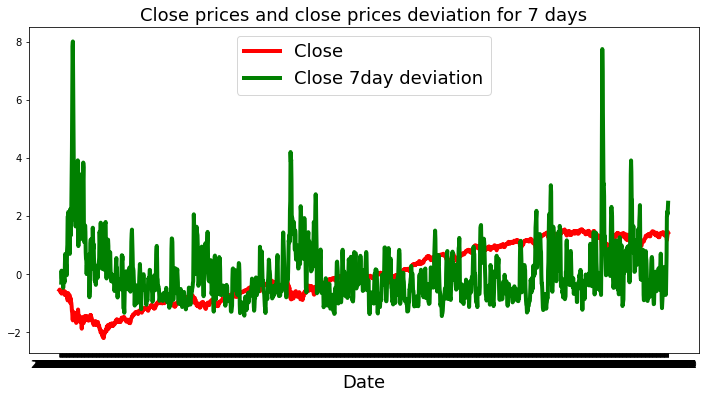

In [20]:
#plot colse std normalised with close values
df_stock_close_norm = (df_stock["Close"] - df_stock["Close"].mean())/df_stock["Close"].std()
df_stock_c_std_norm = (df_stock["Close 7day deviation"] - df_stock["Close 7day deviation"].mean())/df_stock["Close 7day deviation"].std()

#Visualize
f = plt.figure(figsize=(16,8))
plt.title("Close prices and close prices deviation for 7 days", fontsize = 18)
plt.plot(df_stock_close_norm, color = "red", linewidth = 4,
         label = "Close")
plt.plot(df_stock_c_std_norm, color = "green", linewidth = 4,
         label = "Close 7day deviation")
plt.xlabel("Date",fontsize = 18)
plt.legend(fontsize = 18)
f.set_size_inches(12,6)
plt.show()

In [21]:
#create input and output data
input = pd.DataFrame()
output = pd.DataFrame()

#input features:
#   Open
#   High
#   Low
#   Close
#   Volume
#   High - Low
#   Open - Close
#   7 days MA close
#   14 days MA close
#   21 days MA close
#   7 days MA volume
#   7 days std 
input["Open"] = df_stock["Open"][24:]
input["High"] = df_stock["Open"][24:]
input["Low"] = df_stock["Low"][24:]
input["Close"] = df_stock["Close"][24:]
input["Volume"] = df_stock["Volume"][24:]
input["High-Low"] = df_stock["High-Low"][24:]
input["Open-Close"] = df_stock["Open-Close"][24:]
input["7d MA close"] = df_stock["MA for 7 days"][24:]
input["14d MA close"] = df_stock["MA for 14 days"][24:]
input["21d MA close"] = df_stock["MA for 21 days"][24:]
input["7d MA volume"] = df_stock["Volume diff MA for 7 days"][24:]
input["14d std"] = df_stock["Close 7day deviation"][24:]

input

,Open,High,Low,Close,Volume,High-Low,Open-Close,7d MA close,14d MA close,21d MA close,7d MA volume,14d std
Date,,,,,,,,,,,,
2008-09-12,11429.320312,11429.320312,11280.400391,11421.990234,238890000,179.529297,7.330078,11325.040179,11420.417899,11450.729492,9.234286e+06,127.335736
2008-09-15,11416.370117,11416.370117,10917.509766,10917.509766,432970000,498.940429,498.860351,11286.365792,11386.936454,11417.471401,2.911000e+07,197.560338
2008-09-16,10905.620117,10905.620117,10742.700195,11059.019531,494760000,350.519532,-153.399414,11263.231445,11361.661412,11388.858026,4.235143e+07,215.190821
2008-09-17,11056.580078,11056.580078,10595.900391,10609.660156,463200000,461.409179,446.919922,11134.505720,11297.886440,11347.442336,2.717143e+07,296.576347
2008-09-18,10609.009766,10609.009766,10459.440430,11019.690430,488060000,617.000000,-410.680664,11104.357143,11248.208636,11331.782366,3.296571e+07,295.890174
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,292.130860,214.970704,17663.235770,17734.200056,17773.005766,6.684286e+06,295.849930
2016-06-28,17190.509766,17190.509766,17190.509766,17409.720703,112190000,219.210937,-219.210937,17625.315848,17691.676479,17750.934338,-1.949857e+07,310.704936
2016-06-29,17456.019531,17456.019531,17456.019531,17694.679688,106380000,248.490235,-238.660157,17609.574498,17670.925781,17746.528646,1.000000e+06,302.782312


In [22]:
#output:
#   close for next day
#input start from 24. day and last to last before one,
#output start from 25. day and last to the last
#will drop the rows after normalizatin for get the same values
output["Next Close"] = df_stock["Close"][24:]

output

,Next Close
Date,
2008-09-12,11421.990234
2008-09-15,10917.509766
2008-09-16,11059.019531
2008-09-17,10609.660156
2008-09-18,11019.690430
...,...
2016-06-27,17140.240234
2016-06-28,17409.720703
2016-06-29,17694.679688


In [23]:
# normalize the input and output
input_norm = (input - input.mean())/input.std()
input_norm

,Open,High,Low,Close,Volume,High-Low,Open-Close,7d MA close,14d MA close,21d MA close,7d MA volume,14d std
Date,,,,,,,,,,,,
2008-09-12,-0.651042,-0.651042,-0.669552,-0.654465,0.808600,0.105403,0.080010,-0.683517,-0.651088,-0.639290,0.810272,-0.039496
2008-09-15,-0.655147,-0.655147,-0.784327,-0.814340,2.865349,2.947828,3.569531,-0.695798,-0.661743,-0.649898,2.544938,0.793717
2008-09-16,-0.817044,-0.817044,-0.839616,-0.769494,3.520164,1.627037,-1.061057,-0.703145,-0.669787,-0.659024,3.700592,1.002903
2008-09-17,-0.769193,-0.769193,-0.886046,-0.911900,3.185709,2.613839,3.200790,-0.744024,-0.690083,-0.672233,2.375748,1.968539
2008-09-18,-0.911064,-0.911064,-0.929205,-0.781958,3.449161,3.998434,-2.887574,-0.753598,-0.705893,-0.677228,2.881448,1.960398
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-27,1.227353,1.227353,1.159396,1.157699,-0.252732,1.107439,1.554113,1.329279,1.358246,1.377181,0.587719,1.959921
2016-06-28,1.175146,1.175146,1.199700,1.243100,-0.534093,0.458528,-1.528273,1.317237,1.344713,1.370141,-1.697407,2.136175
2016-06-29,1.259307,1.259307,1.283675,1.333406,-0.595664,0.719083,-1.666348,1.312238,1.338109,1.368736,0.091619,2.042173


In [24]:
output_norm = (output - output.mean())/output.std()
output_norm

,Next Close
Date,
2008-09-12,-0.654465
2008-09-15,-0.814340
2008-09-16,-0.769494
2008-09-17,-0.911900
2008-09-18,-0.781958
...,...
2016-06-27,1.157699
2016-06-28,1.243100
2016-06-29,1.333406


In [25]:
# drop the input last row
input_norm.drop(input_norm.tail(1).index,inplace=True)
input_norm

,Open,High,Low,Close,Volume,High-Low,Open-Close,7d MA close,14d MA close,21d MA close,7d MA volume,14d std
Date,,,,,,,,,,,,
2008-09-12,-0.651042,-0.651042,-0.669552,-0.654465,0.808600,0.105403,0.080010,-0.683517,-0.651088,-0.639290,0.810272,-0.039496
2008-09-15,-0.655147,-0.655147,-0.784327,-0.814340,2.865349,2.947828,3.569531,-0.695798,-0.661743,-0.649898,2.544938,0.793717
2008-09-16,-0.817044,-0.817044,-0.839616,-0.769494,3.520164,1.627037,-1.061057,-0.703145,-0.669787,-0.659024,3.700592,1.002903
2008-09-17,-0.769193,-0.769193,-0.886046,-0.911900,3.185709,2.613839,3.200790,-0.744024,-0.690083,-0.672233,2.375748,1.968539
2008-09-18,-0.911064,-0.911064,-0.929205,-0.781958,3.449161,3.998434,-2.887574,-0.753598,-0.705893,-0.677228,2.881448,1.960398
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-24,1.414821,1.414821,1.252149,1.240257,0.809766,3.760752,3.903343,1.356175,1.376387,1.387631,1.810576,0.649803
2016-06-27,1.227353,1.227353,1.159396,1.157699,-0.252732,1.107439,1.554113,1.329279,1.358246,1.377181,0.587719,1.959921
2016-06-28,1.175146,1.175146,1.199700,1.243100,-0.534093,0.458528,-1.528273,1.317237,1.344713,1.370141,-1.697407,2.136175


In [26]:
# drop the output first row
output_norm.drop(output_norm.head(1).index,inplace=True)
output_norm

,Next Close
Date,
2008-09-15,-0.814340
2008-09-16,-0.769494
2008-09-17,-0.911900
2008-09-18,-0.781958
2008-09-19,-0.665098
...,...
2016-06-27,1.157699
2016-06-28,1.243100
2016-06-29,1.333406


In [27]:
#todo create corrplot -> https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec

In [28]:
pip install heatmapz

In [29]:
from heatmap import heatmap, corrplot

In [30]:
#join input and output for heatmap
data = pd.concat([input_norm,output_norm],axis=1,join="inner")
data

,Open,High,Low,Close,Volume,High-Low,Open-Close,7d MA close,14d MA close,21d MA close,7d MA volume,14d std,Next Close
Date,,,,,,,,,,,,,
2008-09-15,-0.655147,-0.655147,-0.784327,-0.814340,2.865349,2.947828,3.569531,-0.695798,-0.661743,-0.649898,2.544938,0.793717,-0.814340
2008-09-16,-0.817044,-0.817044,-0.839616,-0.769494,3.520164,1.627037,-1.061057,-0.703145,-0.669787,-0.659024,3.700592,1.002903,-0.769494
2008-09-17,-0.769193,-0.769193,-0.886046,-0.911900,3.185709,2.613839,3.200790,-0.744024,-0.690083,-0.672233,2.375748,1.968539,-0.911900
2008-09-18,-0.911064,-0.911064,-0.929205,-0.781958,3.449161,3.998434,-2.887574,-0.753598,-0.705893,-0.677228,2.881448,1.960398,-0.781958
2008-09-19,-0.778408,-0.778408,-0.749792,-0.665098,5.219461,2.568814,-2.534383,-0.748176,-0.709428,-0.677668,5.500840,2.128728,-0.665098
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-24,1.414821,1.414821,1.252149,1.240257,0.809766,3.760752,3.903343,1.356175,1.376387,1.387631,1.810576,0.649803,1.240257
2016-06-27,1.227353,1.227353,1.159396,1.157699,-0.252732,1.107439,1.554113,1.329279,1.358246,1.377181,0.587719,1.959921,1.157699
2016-06-28,1.175146,1.175146,1.199700,1.243100,-0.534093,0.458528,-1.528273,1.317237,1.344713,1.370141,-1.697407,2.136175,1.243100


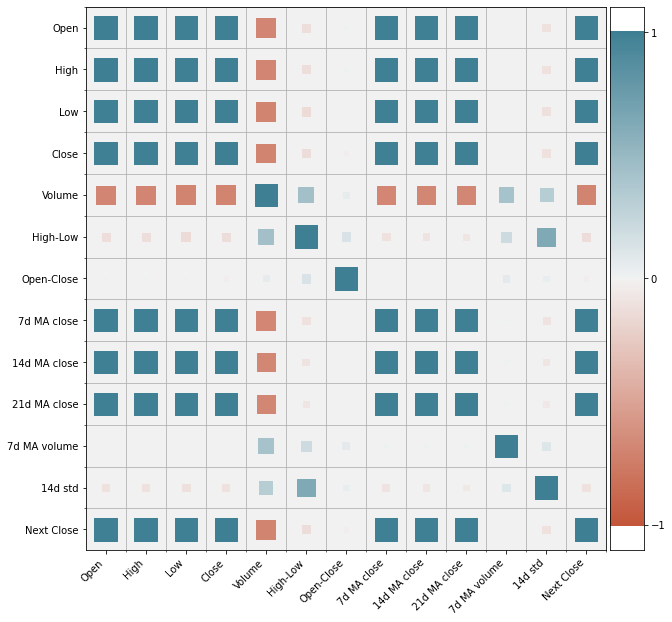

In [31]:
plt.figure(figsize=(10, 10))
corrplot(data.corr(), size_scale=500)

In [32]:
print(input_norm.shape)
print(output_norm.shape)

(1964, 12)
(1964, 1)


In [33]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Torch seed
TORCH_SEED = 1234

torch.backends.cudnn.deterministic = True
torch.manual_seed(TORCH_SEED)
if torch.cuda.is_available():
  torch.cuda.manual_seed_all(TORCH_SEED)

In [34]:
#try out ann model
class ANN(nn.Module):

    def __init__(self):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(12, 24)
        self.fc2 = nn.Linear(24, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 12)
        self.fc5 = nn.Linear(12, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))      

        x = self.fc5(x)
        return x


ANN = ANN()
print(ANN)

ANN(
  (fc1): Linear(in_features=12, out_features=24, bias=True)
  (fc2): Linear(in_features=24, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=12, bias=True)
  (fc5): Linear(in_features=12, out_features=1, bias=True)
)


In [35]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(ANN):,} trainable parameters')

The model has 12,561 trainable parameters


In [36]:
import torch.optim as optim
optimizer = optim.Adam(ANN.parameters(), lr=0.01)

In [37]:
# Set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Show it
print(device)

cuda


In [38]:
criterion = nn.MSELoss()

ANN = ANN.to(device)
criterion = criterion.to(device)

In [39]:
#split the data to train, valid and test
data.reset_index(inplace=True, drop=True)

data

,Open,High,Low,Close,Volume,High-Low,Open-Close,7d MA close,14d MA close,21d MA close,7d MA volume,14d std,Next Close
0,-0.655147,-0.655147,-0.784327,-0.814340,2.865349,2.947828,3.569531,-0.695798,-0.661743,-0.649898,2.544938,0.793717,-0.814340
1,-0.817044,-0.817044,-0.839616,-0.769494,3.520164,1.627037,-1.061057,-0.703145,-0.669787,-0.659024,3.700592,1.002903,-0.769494
2,-0.769193,-0.769193,-0.886046,-0.911900,3.185709,2.613839,3.200790,-0.744024,-0.690083,-0.672233,2.375748,1.968539,-0.911900
3,-0.911064,-0.911064,-0.929205,-0.781958,3.449161,3.998434,-2.887574,-0.753598,-0.705893,-0.677228,2.881448,1.960398,-0.781958
4,-0.778408,-0.778408,-0.749792,-0.665098,5.219461,2.568814,-2.534383,-0.748176,-0.709428,-0.677668,5.500840,2.128728,-0.665098
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1958,1.414821,1.414821,1.252149,1.240257,0.809766,3.760752,3.903343,1.356175,1.376387,1.387631,1.810576,0.649803,1.240257
1959,1.227353,1.227353,1.159396,1.157699,-0.252732,1.107439,1.554113,1.329279,1.358246,1.377181,0.587719,1.959921,1.157699
1960,1.175146,1.175146,1.199700,1.243100,-0.534093,0.458528,-1.528273,1.317237,1.344713,1.370141,-1.697407,2.136175,1.243100
1961,1.259307,1.259307,1.283675,1.333406,-0.595664,0.719083,-1.666348,1.312238,1.338109,1.368736,0.091619,2.042173,1.333406


In [40]:
import numpy as np

#shuffle only the train-valid data
np.random.seed(42)
#split to 80% train+valid and 20% test
train_valid, test = np.split(data, [int(.8*len(data))])

In [41]:
#shuffle and split 60% 20% the train and valid
#80% is train+valid -> 75% of train+valid is 60% train from the complete


In [42]:
train, valid = np.split(train_valid.sample(frac=1,random_state=42),
                        [int(0.75*len(train_valid))])

In [43]:
train

,Open,High,Low,Close,Volume,High-Low,Open-Close,7d MA close,14d MA close,21d MA close,7d MA volume,14d std,Next Close
1492,1.063743,1.063743,1.088543,1.087773,-1.010659,-0.690688,-0.543730,1.024166,0.995885,1.044938,-0.185169,0.039046,1.087773
985,-0.101451,-0.101451,-0.095642,-0.088479,-0.804857,-0.484326,-0.290076,-0.114862,-0.145558,-0.162915,-0.570928,-0.234272,-0.088479
432,-1.024651,-1.024651,-1.019162,-1.024206,0.151348,-0.244671,-0.004759,-1.061539,-1.024206,-0.973616,-0.426549,-0.102174,-1.024206
964,-0.279099,-0.279099,-0.286268,-0.289615,-0.210130,-0.260696,0.236978,-0.234173,-0.242983,-0.240362,0.417282,0.133145,-0.289615
1170,0.514117,0.514117,0.521709,0.505621,-0.686484,-0.620478,0.187706,0.470792,0.437046,0.425055,-0.624540,0.190915,0.505621
...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,-0.163874,-0.163874,-0.152614,-0.173816,-0.406818,-0.930872,0.223556,-0.183745,-0.190260,-0.206044,0.011575,-0.805846,-0.173816
46,-1.651427,-1.651427,-1.673730,-1.604318,2.159772,1.822732,-1.046935,-1.563503,-1.464390,-1.482262,1.501620,1.400320,-1.604318
1351,0.747326,0.747326,0.772826,0.773707,-0.778682,-0.557386,-0.594777,0.850507,0.896466,0.923944,0.026038,1.651295,0.773707
991,-0.066129,-0.066129,-0.052913,-0.068295,-0.794790,-1.082059,0.048846,-0.083046,-0.100898,-0.127697,0.044740,-0.966156,-0.068295


In [44]:
valid

,Open,High,Low,Close,Volume,High-Low,Open-Close,7d MA close,14d MA close,21d MA close,7d MA volume,14d std,Next Close
773,-0.748009,-0.748009,-0.742066,-0.755518,0.270145,0.117779,0.172017,-0.800450,-0.785293,-0.756757,0.199716,0.632224,-0.755518
1569,1.417455,1.417455,1.393823,1.383415,-0.783239,-0.101480,0.755358,1.395783,1.385365,1.370934,0.269038,-0.841989,1.383415
4,-0.778408,-0.778408,-0.749792,-0.665098,5.219461,2.568814,-2.534383,-0.748176,-0.709428,-0.677668,5.500840,2.128728,-0.665098
1003,-0.138829,-0.138829,-0.111418,-0.061843,-0.359660,0.724063,-1.723919,-0.120873,-0.104277,-0.095856,0.410549,-0.428264,-0.061843
1362,0.795570,0.795570,0.800630,0.784919,-0.903731,-0.532827,0.234558,0.713470,0.723900,0.797860,-0.915043,1.143117,0.784919
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0.306475,0.306475,0.320804,0.306811,-0.833682,-0.948140,-0.009092,0.285238,0.230352,0.211185,-0.330920,-0.572395,0.306811
1294,0.677704,0.677704,0.693009,0.681981,-0.968482,-0.865556,-0.099247,0.675823,0.651001,0.606868,-0.220578,-0.994711,0.681981
860,-0.216844,-0.216844,-0.189214,-0.194298,-0.533563,-0.701820,-0.503977,-0.195374,-0.218914,-0.234615,-0.022089,-1.185380,-0.194298
1459,1.098817,1.098817,1.123540,1.105726,-1.110063,-1.163670,-0.160368,1.079757,1.084131,1.087882,-0.067971,-0.803359,1.105726


In [45]:
test

,Open,High,Low,Close,Volume,High-Low,Open-Close,7d MA close,14d MA close,21d MA close,7d MA volume,14d std,Next Close
1570,1.383357,1.383357,1.338566,1.367163,-0.659037,0.445962,0.355746,1.394557,1.387942,1.374386,0.252830,-0.793488,1.367163
1571,1.367705,1.367705,1.300147,1.282216,-0.503255,1.087504,1.908149,1.383503,1.384474,1.373162,0.362298,0.128505,1.282216
1572,1.284121,1.284121,1.308434,1.302241,-0.768190,0.503006,-0.412462,1.370655,1.381685,1.372880,0.105708,0.405683,1.302241
1573,1.301792,1.301792,1.228266,1.202254,-0.430662,1.259521,2.223222,1.341993,1.369655,1.367847,0.285496,1.334574,1.202254
1574,1.205332,1.205332,1.175906,1.170566,-0.514382,1.072991,0.772691,1.309362,1.355173,1.360679,0.475383,1.925796,1.170566
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1958,1.414821,1.414821,1.252149,1.240257,0.809766,3.760752,3.903343,1.356175,1.376387,1.387631,1.810576,0.649803,1.240257
1959,1.227353,1.227353,1.159396,1.157699,-0.252732,1.107439,1.554113,1.329279,1.358246,1.377181,0.587719,1.959921,1.157699
1960,1.175146,1.175146,1.199700,1.243100,-0.534093,0.458528,-1.528273,1.317237,1.344713,1.370141,-1.697407,2.136175,1.243100
1961,1.259307,1.259307,1.283675,1.333406,-0.595664,0.719083,-1.666348,1.312238,1.338109,1.368736,0.091619,2.042173,1.333406


In [211]:
train_Y = torch.tensor(train["Next Close"].values.astype(np.float32))
train_Y = train_Y.view(-1,1)
train_X = torch.tensor(train.drop("Next Close",axis=1).values.astype(np.float32))

valid_Y = torch.tensor(valid["Next Close"].values.astype(np.float32))
valid_Y = valid_Y.view(-1,1)
valid_X = torch.tensor(valid.drop("Next Close",axis=1).values.astype(np.float32))

test_Y = torch.tensor(test["Next Close"].values.astype(np.float32))
test_Y = test_Y.view(-1,1)
test_X = torch.tensor(test.drop("Next Close",axis=1).values.astype(np.float32))

In [212]:
train_Y.size()

torch.Size([1177, 1])

In [213]:
train_X.size()

torch.Size([1177, 12])

In [214]:
train.shape

(1177, 13)

In [215]:
import torch.utils.data as data_utils

train_tensor = data_utils.TensorDataset(train_X, train_Y) 
valid_tensor = data_utils.TensorDataset(valid_X, valid_Y) 
test_tensor = data_utils.TensorDataset(test_X, test_Y) 

train_tensor

In [216]:
train_loader = data_utils.DataLoader(dataset = train_tensor, 
                                     batch_size = 32, shuffle = True)
valid_loader = data_utils.DataLoader(dataset = valid_tensor, 
                                     batch_size = 32, shuffle = True)

In [217]:
#save the time
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [218]:
import time

# Training with Validation
epochs = 1000
min_valid_loss = np.inf

#store the losses
train_loss_array = []
valid_loss_array = []
  
for e in range(epochs):
    start_time = time.time()

    train_loss = 0.0
    ANN.train()
    for x, y in train_loader:
        # Transfer Data to GPU if available
        if torch.cuda.is_available():
            x, y = x.cuda(), y.cuda()
          
        # Clear the gradients
        optimizer.zero_grad()
        # Forward Pass
        pred_y = ANN(x)
        # Find the Loss
        loss = criterion(pred_y,y)
        # Calculate gradients 
        loss.backward()
        # Update Weights
        optimizer.step()
        # Calculate Loss
        train_loss += loss.item() * x.size(0)

    train_loss = train_loss / len(train_loader.sampler)
    train_loss_array.append(train_loss) 

    valid_loss = 0.0
    ANN.eval()     # Optional when not using Model Specific layer
    for x, y in valid_loader:
        # Transfer Data to GPU if available
        if torch.cuda.is_available():
            x, y = x.cuda(), y.cuda()
          
        # Forward Pass
        pred_y = ANN(x)
        # Find the Loss
        loss = criterion(pred_y,y)
        # Calculate Loss
        valid_loss += loss.item() * x.size(0)
  
    valid_loss = valid_loss / len(valid_loader.sampler)
    valid_loss_array.append(valid_loss)

    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    print(f'Epoch {e+1} \t\t Epoch time: {epoch_mins}m {epoch_secs}s\n\t\t Training Loss: {train_loss} \t\t Validation Loss: {valid_loss}')
      
    if min_valid_loss > valid_loss:
        print(f'\t\t Validation Loss Decreased({min_valid_loss:.6f}--->{valid_loss:.6f}) \t Saving The Model')
        min_valid_loss = valid_loss
          
        # Saving State Dict
        torch.save(ANN.state_dict(), 'drive/MyDrive/price_feature_best_model.pt')

    print("")

# Saving State Dict
torch.save(ANN.state_dict(), 'drive/MyDrive/price_feature_last_model.pt')    

Epoch 1 		 Epoch time: 0m 0s
		 Training Loss: 2.915844694652195e-06 		 Validation Loss: 3.6962149747627796e-06
		 Validation Loss Decreased(inf--->0.000004) 	 Saving The Model

Epoch 2 		 Epoch time: 0m 0s
		 Training Loss: 2.9158447023794227e-06 		 Validation Loss: 3.6962122376002894e-06
		 Validation Loss Decreased(0.000004--->0.000004) 	 Saving The Model

Epoch 3 		 Epoch time: 0m 0s
		 Training Loss: 2.9158446873113283e-06 		 Validation Loss: 3.6962148532653956e-06

Epoch 4 		 Epoch time: 0m 0s
		 Training Loss: 2.91584462085717e-06 		 Validation Loss: 3.696213741275054e-06

Epoch 5 		 Epoch time: 0m 0s
		 Training Loss: 2.9158446904022197e-06 		 Validation Loss: 3.696211241900301e-06
		 Validation Loss Decreased(0.000004--->0.000004) 	 Saving The Model

Epoch 6 		 Epoch time: 0m 0s
		 Training Loss: 2.915844675913668e-06 		 Validation Loss: 3.696216432731385e-06

Epoch 7 		 Epoch time: 0m 0s
		 Training Loss: 2.915844696390821e-06 		 Validation Loss: 3.6962099401426174e-06
		 Val

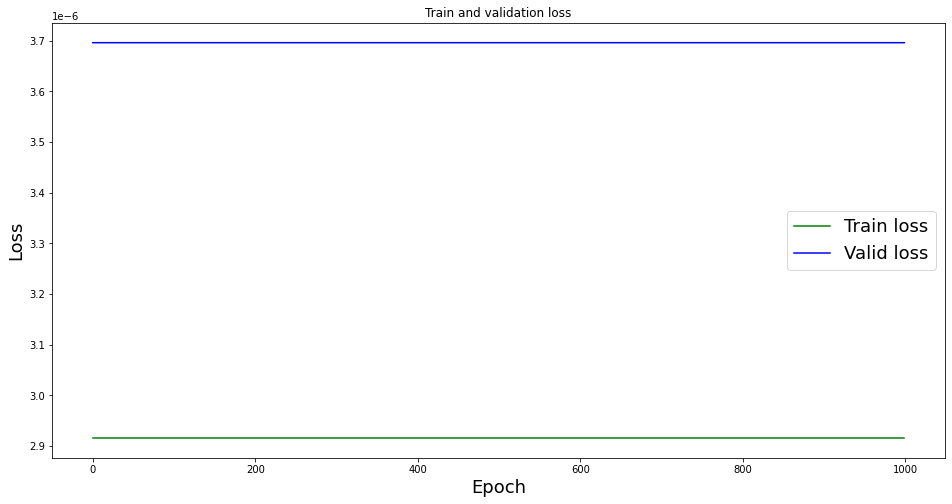

In [219]:
# Visualize the training
plt.figure(figsize=(16,8))
plt.title('Train and validation loss')
plt.plot(train_loss_array, color = "green", label = "Train loss")
plt.plot(valid_loss_array, color = "blue", label = "Valid loss")
plt.xlabel('Epoch',fontsize=18)
plt.ylabel('Loss',fontsize=18)
plt.legend(fontsize=18)
plt.show()

In [220]:
#for the test calculate all the point and then inverse it back and
#after that plot it with the real values to compare them
ANN.load_state_dict(torch.load('drive/MyDrive/price_feature_best_model.pt'))

predict_test_array = []

with torch.no_grad():
    for x in test_X:
        ANN.eval()
        predict = ANN(x.to(device))        
        predict_test_array.append(predict.cpu()*output.std()+output.mean())

real_test_array = []

for y in test_Y:
    real_test_array.append(y*output.std()+output.mean())

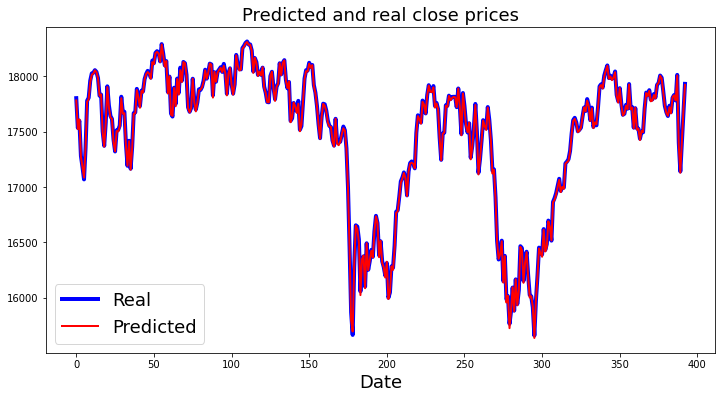

In [221]:
#visualize it
f = plt.figure(figsize=(24,12))
plt.title("Predicted and real close prices", fontsize = 18)
plt.plot(real_test_array, color = "blue", linewidth = 4,
         label = "Real")
plt.plot(predict_test_array, color = "red", linewidth = 2,
         label = "Predicted")
plt.xlabel("Date",fontsize = 18)
plt.legend(fontsize = 18)
f.set_size_inches(12,6)
plt.show()

In [222]:
#check how good it is predict the trend and check the exact differences in
#percantage to a day-to-day
diff_percentage_array = []
diff_array = []
for element in range(len(real_test_array)):
    diff_percentage_array.append(abs(real_test_array[element].values-predict_test_array[element].values)/real_test_array[element].values*100) 
    diff_array.append(abs(real_test_array[element].values-predict_test_array[element].values))

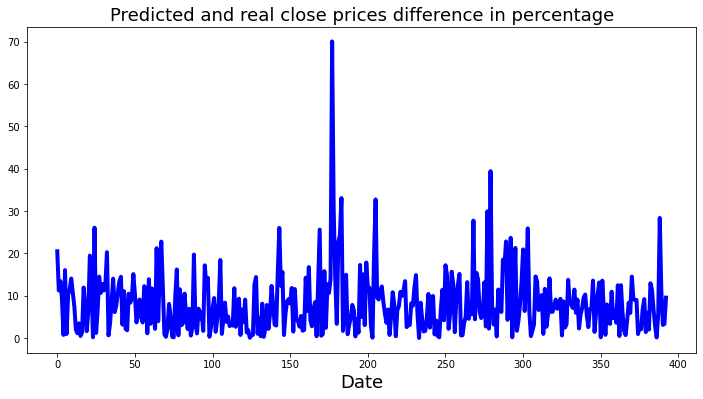

In [223]:
#visualize it
f = plt.figure(figsize=(24,12))
plt.title("Predicted and real close prices difference in percentage", fontsize = 18)
plt.plot(diff_array, color = "blue", linewidth = 4)
plt.xlabel("Date",fontsize = 18)
f.set_size_inches(12,6)
plt.show()

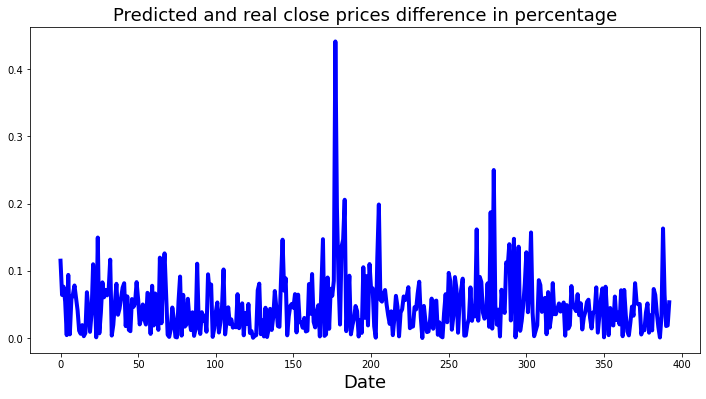

In [224]:
#visualize it
f = plt.figure(figsize=(24,12))
plt.title("Predicted and real close prices difference in percentage", fontsize = 18)
plt.plot(diff_percentage_array, color = "blue", linewidth = 4)
plt.xlabel("Date",fontsize = 18)
f.set_size_inches(12,6)
plt.show()

In [225]:
#check the trend -> create an array with the real and with the predicted trend
#if the current value is bigger than before -> 1
#otherwise (same or smaller) -> 0
real_trend_array = []
predicted_trend_array = []

for element in range(len(real_test_array)):
    if element == 1:
        real_trend_array.append(0)
    elif real_test_array[element].values > real_test_array[element - 1].values:
        real_trend_array.append(1)
    else:
        real_trend_array.append(0)        

for element in range(len(predict_test_array)):
    if element == 1:
        predicted_trend_array.append(0)
    elif predict_test_array[element].values > predict_test_array[element - 1].values:
        predicted_trend_array.append(1)
    else:
        predicted_trend_array.append(0)   

In [226]:
#check the number of differences
trend_diff_array = []
for element in range(len(real_trend_array)):
    if real_trend_array[element] != predicted_trend_array[element]:
      trend_diff_array.append(element)

trend_diff_array

[27, 80, 106, 112, 293, 362]

In [227]:
len(real_trend_array)

393

In [228]:
#percentage of wrong predict
print("The percentage of wrong trend predict:\t" + str(len(trend_diff_array)/len(real_trend_array)*100) + " %")

The percentage of wrong trend predict:	1.5267175572519083 %


In [257]:
pad = nn.ZeroPad2d((0,0,0,1184-train_X.size()[0]))
train_X_p = pad(train_X)
train_Y_p = pad(train_Y)

pad = nn.ZeroPad2d((0,0,0,416-valid_X.size()[0]))
valid_X_p = pad(valid_X)
valid_Y_p = pad(valid_Y)

train_tensor = data_utils.TensorDataset(train_X_p, train_Y_p) 
valid_tensor = data_utils.TensorDataset(valid_X_p, valid_Y_p) 

train_loader = data_utils.DataLoader(dataset = train_tensor, 
                                     batch_size = 32, shuffle = True)
valid_loader = data_utils.DataLoader(dataset = valid_tensor, 
                                     batch_size = 32, shuffle = True)

In [272]:
#check the sames with a modified, LSTM model, dropout
class LSTM(nn.Module):

    def __init__(self):
        super(LSTM, self).__init__()
        self.lstm = nn.LSTM(12, #input size
                          32, #features in hidden state
                          num_layers=10, 
                          bidirectional=False, 
                          dropout=0.33)
        self.fc1 = nn.Linear(32, 8)
        self.fc2 = nn.Linear(8, 1)

        self.dropout = nn.Dropout(0.33)

    def forward(self, x):

        #print("input")
        #print(x.shape) # batch size | input size -> seq. length | batch size | input size

        #if x.size()[0] != 32:
        #    print(x)

        x_reshaped = torch.reshape(x,(-1,32,12))
        #print("reshaped")
        #print(x_reshaped.shape)

        output, (hidden, cell) = self.lstm(x_reshaped)

        hidden = self.dropout(hidden[-1,:,:])

        x = self.dropout(hidden)

        x = F.relu(self.fc1(x))

        x = self.fc2(x)

        return x


LSTM = LSTM()
print(LSTM)

LSTM(
  (lstm): LSTM(12, 32, num_layers=10, dropout=0.33)
  (fc1): Linear(in_features=32, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=1, bias=True)
  (dropout): Dropout(p=0.33, inplace=False)
)


In [273]:
print(f'The model has {count_parameters(LSTM):,} trainable parameters')

The model has 82,193 trainable parameters


In [274]:
optimizer = optim.Adam(LSTM.parameters(), lr=0.01)

In [275]:
# Set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Show it
print(device)

cuda


In [276]:
criterion = nn.MSELoss()

LSTM = LSTM.to(device)
criterion = criterion.to(device)

In [277]:
# Training with Validation
epochs = 1000
min_valid_loss = np.inf

#store the losses
train_loss_array = []
valid_loss_array = []
  
for e in range(epochs):
    start_time = time.time()

    train_loss = 0.0
    LSTM.train()
    for x, y in train_loader:
        # Transfer Data to GPU if available
        if torch.cuda.is_available():
            x, y = x.cuda(), y.cuda()
          
        # Clear the gradients
        optimizer.zero_grad()
        # Forward Pass
        pred_y = LSTM(x)
        # Find the Loss
        loss = criterion(pred_y,y)
        # Calculate gradients 
        loss.backward()
        # Update Weights
        optimizer.step()
        # Calculate Loss
        train_loss += loss.item() * x.size(0)

    train_loss = train_loss / len(train_loader.sampler)
    train_loss_array.append(train_loss) 

    valid_loss = 0.0
    LSTM.eval()     # Optional when not using Model Specific layer
    for x, y in valid_loader:
        # Transfer Data to GPU if available
        if torch.cuda.is_available():
            x, y = x.cuda(), y.cuda()
          
        # Forward Pass
        pred_y = LSTM(x)
        # Find the Loss
        loss = criterion(pred_y,y)
        # Calculate Loss
        valid_loss += loss.item() * x.size(0)
  
    valid_loss = valid_loss / len(valid_loader.sampler)
    valid_loss_array.append(valid_loss)

    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    print(f'Epoch {e+1} \t\t Epoch time: {epoch_mins}m {epoch_secs}s\n\t\t Training Loss: {train_loss} \t\t Validation Loss: {valid_loss}')
      
    if min_valid_loss > valid_loss:
        print(f'\t\t Validation Loss Decreased({min_valid_loss:.6f}--->{valid_loss:.6f}) \t Saving The Model')
        min_valid_loss = valid_loss
          
        # Saving State Dict
        torch.save(LSTM.state_dict(), 'drive/MyDrive/price_feature_best_model_lstm.pt')

    print("")

# Saving State Dict
torch.save(LSTM.state_dict(), 'drive/MyDrive/price_feature_last_model_lstm.pt')  

Epoch 1 		 Epoch time: 0m 0s
		 Training Loss: 0.7519216311944498 		 Validation Loss: 0.7037648421067458
		 Validation Loss Decreased(inf--->0.703765) 	 Saving The Model

Epoch 2 		 Epoch time: 0m 0s
		 Training Loss: 0.4549973437914977 		 Validation Loss: 0.27491909724015456
		 Validation Loss Decreased(0.703765--->0.274919) 	 Saving The Model

Epoch 3 		 Epoch time: 0m 0s
		 Training Loss: 0.2720825523138046 		 Validation Loss: 0.24466476417504823
		 Validation Loss Decreased(0.274919--->0.244665) 	 Saving The Model

Epoch 4 		 Epoch time: 0m 0s
		 Training Loss: 0.33586543274892344 		 Validation Loss: 0.28022402410323805

Epoch 5 		 Epoch time: 0m 0s
		 Training Loss: 0.26119127627965566 		 Validation Loss: 0.2367994670684521
		 Validation Loss Decreased(0.244665--->0.236799) 	 Saving The Model

Epoch 6 		 Epoch time: 0m 0s
		 Training Loss: 0.22522304589683945 		 Validation Loss: 0.2047065909092243
		 Validation Loss Decreased(0.236799--->0.204707) 	 Saving The Model

Epoch 7 		 Ep

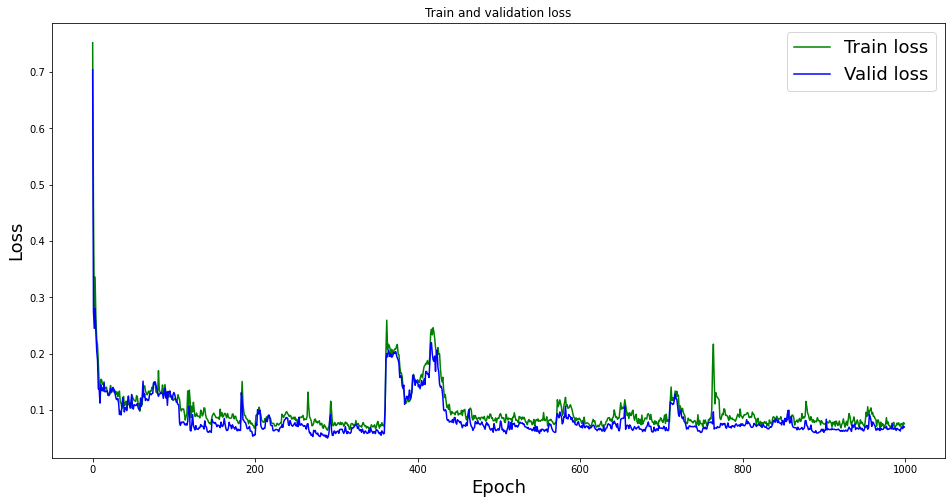

In [278]:
# Visualize the training
plt.figure(figsize=(16,8))
plt.title('Train and validation loss')
plt.plot(train_loss_array, color = "green", label = "Train loss")
plt.plot(valid_loss_array, color = "blue", label = "Valid loss")
plt.xlabel('Epoch',fontsize=18)
plt.ylabel('Loss',fontsize=18)
plt.legend(fontsize=18)
plt.show()

In [280]:
#for the test calculate all the point and then inverse it back and
#after that plot it with the real values to compare them
LSTM.load_state_dict(torch.load('drive/MyDrive/price_feature_best_model_lstm.pt'))

predict_test_array = []

with torch.no_grad():
    for x in test_X:
        ANN.eval()
        predict = ANN(x.to(device))        
        predict_test_array.append(predict.cpu()*output.std()+output.mean())

real_test_array = []

for y in test_Y:
    real_test_array.append(y*output.std()+output.mean())

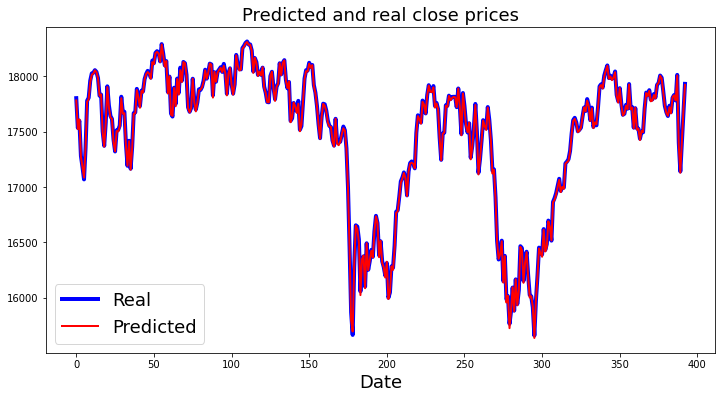

In [281]:
#visualize it
f = plt.figure(figsize=(24,12))
plt.title("Predicted and real close prices", fontsize = 18)
plt.plot(real_test_array, color = "blue", linewidth = 4,
         label = "Real")
plt.plot(predict_test_array, color = "red", linewidth = 2,
         label = "Predicted")
plt.xlabel("Date",fontsize = 18)
plt.legend(fontsize = 18)
f.set_size_inches(12,6)
plt.show()

In [282]:
#check how good it is predict the trend and check the exact differences in
#percantage to a day-to-day
diff_percentage_array = []
diff_array = []
for element in range(len(real_test_array)):
    diff_percentage_array.append(abs(real_test_array[element].values-predict_test_array[element].values)/real_test_array[element].values*100) 
    diff_array.append(abs(real_test_array[element].values-predict_test_array[element].values))

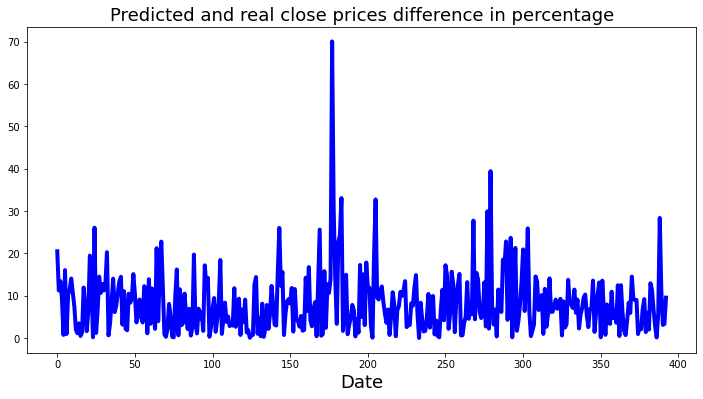

In [283]:
#visualize it
f = plt.figure(figsize=(24,12))
plt.title("Predicted and real close prices difference in percentage", fontsize = 18)
plt.plot(diff_array, color = "blue", linewidth = 4)
plt.xlabel("Date",fontsize = 18)
f.set_size_inches(12,6)
plt.show()

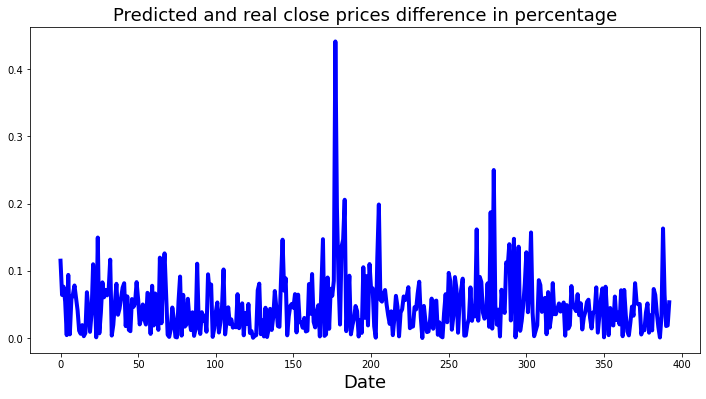

In [284]:
#visualize it
f = plt.figure(figsize=(24,12))
plt.title("Predicted and real close prices difference in percentage", fontsize = 18)
plt.plot(diff_percentage_array, color = "blue", linewidth = 4)
plt.xlabel("Date",fontsize = 18)
f.set_size_inches(12,6)
plt.show()

In [285]:
#check the trend -> create an array with the real and with the predicted trend
#if the current value is bigger than before -> 1
#otherwise (same or smaller) -> 0
real_trend_array = []
predicted_trend_array = []

for element in range(len(real_test_array)):
    if element == 1:
        real_trend_array.append(0)
    elif real_test_array[element].values > real_test_array[element - 1].values:
        real_trend_array.append(1)
    else:
        real_trend_array.append(0)        

for element in range(len(predict_test_array)):
    if element == 1:
        predicted_trend_array.append(0)
    elif predict_test_array[element].values > predict_test_array[element - 1].values:
        predicted_trend_array.append(1)
    else:
        predicted_trend_array.append(0)   

In [286]:
#check the number of differences
trend_diff_array = []
for element in range(len(real_trend_array)):
    if real_trend_array[element] != predicted_trend_array[element]:
      trend_diff_array.append(element)

trend_diff_array

[27, 80, 106, 112, 293, 362]

In [287]:
len(real_trend_array)

393

In [288]:
#percentage of wrong predict
print("The percentage of wrong trend predict:\t" + str(len(trend_diff_array)/len(real_trend_array)*100) + " %")

The percentage of wrong trend predict:	1.5267175572519083 %
